In [1]:
from lib.utils import *
from lib.models import *
from lib.ekyn import *
from lib.env import *

In [5]:
folds = get_leave_one_out_cv_ids_for_ekyn()
train_ids,test_ids = folds[0]
X,y = load_psd_label_pairs_windowed(test_ids)

In [7]:
testloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=False)

In [8]:
criterion = torch.nn.CrossEntropyLoss()

In [28]:
folds = get_leave_one_out_cv_ids_for_ekyn()

all_metrics = pd.DataFrame()

for i,(train_ids,test_ids) in tqdm(enumerate(folds)):
    print(test_ids)
    X_test,y_test = load_psd_label_pairs_windowed(test_ids)
    testloader = DataLoader(TensorDataset(X_test,y_test),batch_size=32,shuffle=False)
    model = RecreatedMLPPSD()
    model.load_state_dict(torch.load(f=f'../runs/mlp_fold_{i}/best_model.pt',map_location='cpu'))
    model.to(DEVICE)
    loss,metrics,y_true,y_pred,logits = evaluate(testloader,model,criterion,DEVICE)
    all_metrics = pd.concat([all_metrics,pd.Series(metrics,name=f'{i}')],axis=1)

0it [00:00, ?it/s]

['E2-1']


1it [00:00,  1.97it/s]

['F1-1']


2it [00:00,  2.13it/s]

['C1-0']


3it [00:01,  2.19it/s]

['A1-1']


4it [00:01,  2.18it/s]

['E1-0']


5it [00:02,  2.19it/s]

['A4-0']


6it [00:02,  2.19it/s]

['B1-0']


7it [00:03,  2.19it/s]

['E4-0']


8it [00:03,  2.22it/s]

['F1-0']


9it [00:04,  2.23it/s]

['C4-1']


10it [00:04,  2.25it/s]

['D1-0']


11it [00:04,  2.26it/s]

['B3-1']


12it [00:05,  2.25it/s]

['A1-0']


13it [00:05,  2.25it/s]

['C4-0']


14it [00:06,  2.26it/s]

['F5-1']


15it [00:06,  2.26it/s]

['E4-1']


16it [00:07,  2.23it/s]


In [29]:
all_metrics.T.describe()

,precision,recall,f1
count,16.000000,16.000000,16.000000
mean,0.853842,0.849193,0.846044
std,0.035641,0.059626,0.045721
min,0.797465,0.688591,0.725245
25%,0.826417,0.847408,0.830082
50%,0.855176,0.866049,0.856345
75%,0.880386,0.888100,0.882804
max,0.905395,0.903602,0.890292


<AxesSubplot:xlabel='value', ylabel='variable'>

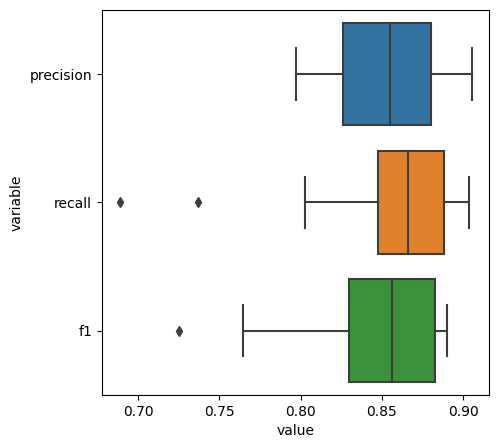

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(data=all_metrics.T.melt(),x='value',y='variable')

<AxesSubplot:xlabel='value', ylabel='variable'>

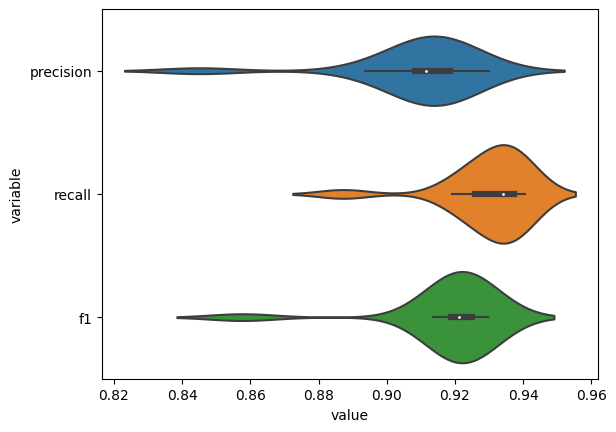

In [14]:
sns.violinplot(data=all_metrics.T.melt(),x='value',y='variable')

<AxesSubplot:xlabel='precision', ylabel='Density'>

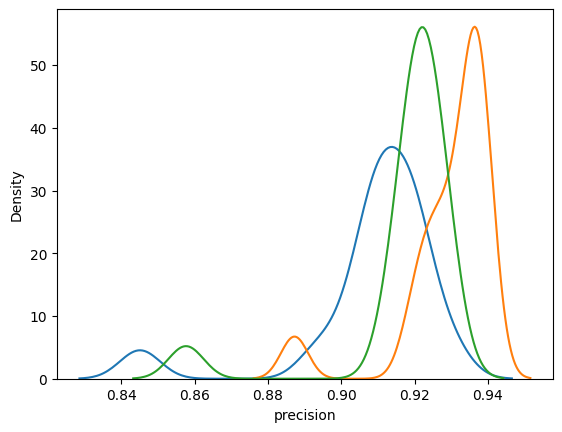

In [15]:
sns.kdeplot(all_metrics.T['precision'],bw_adjust=.5)
sns.kdeplot(all_metrics.T['recall'],bw_adjust=.5)
sns.kdeplot(all_metrics.T['f1'],bw_adjust=.5)

Text(0, 0.5, 'score')

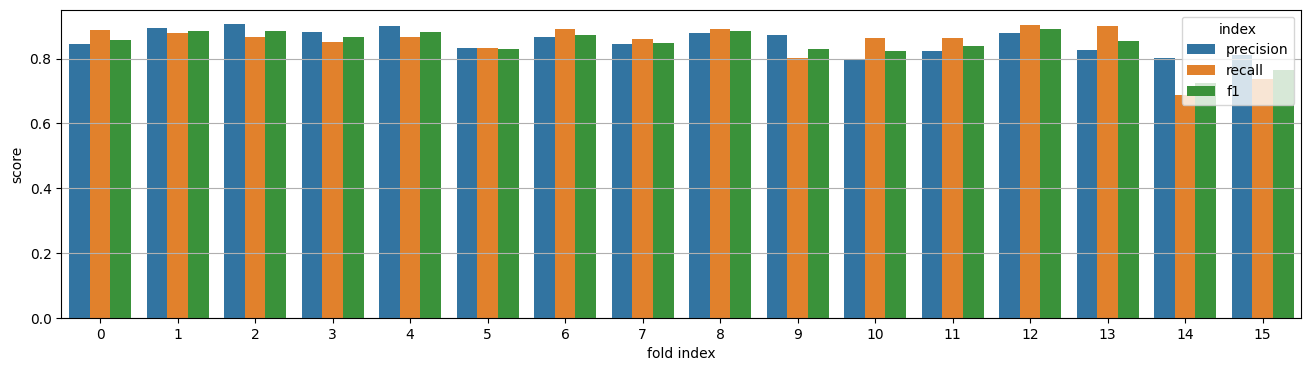

In [31]:
a = all_metrics.reset_index().melt(id_vars='index')
a['variable'] = a['variable'].astype(int)
plt.figure(figsize=(16,4))
plt.grid()
sns.barplot(data=a,x='variable',y='value',hue='index')
plt.xlabel('fold index')
plt.ylabel('score')

<AxesSubplot:xlabel='variable', ylabel='value'>

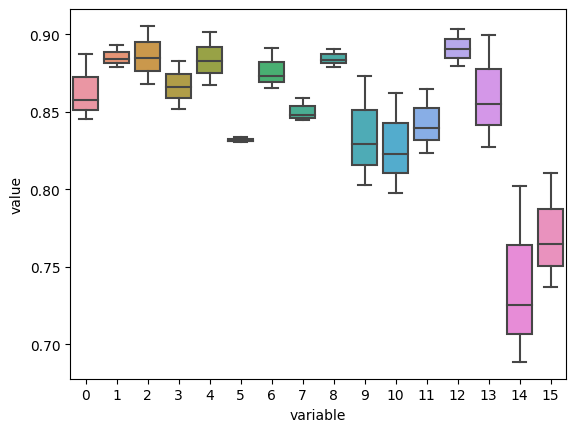

In [32]:
sns.boxplot(data=all_metrics.reset_index().melt(id_vars='index'),x='variable',y='value')

In [ ]:
for i,(train_ids,test_ids) in tqdm(enumerate(folds)):
    X_train,y_train = load_psd_label_pairs_windowed(train_ids)
    X_train,X_dev,y_train,y_dev = train_test_split(X_train,y_train,test_size=.25,shuffle=True,random_state=0)
    trainloader = DataLoader(TensorDataset(X_train,y_train),batch_size=32,shuffle=True)
    devloader = DataLoader(TensorDataset(X_dev,y_dev),batch_size=32,shuffle=True)
    

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)

In [ ]:
optimization_loop(model,trainloader,devloader,criterion,optimizer,epochs=10,DEVICE=DEVICE)
# dev loss .2249

In [ ]:
loss,metrics,y_true,y_pred,_ = evaluate(devloader,model,criterion,DEVICE)
cm_grid(y_true=y_true,y_pred=y_pred)
print(metrics)
print(loss)

In [ ]:
loss,metrics,y_true,y_pred,_ = evaluate(testloader,model,criterion,DEVICE)
cm_grid(y_true=y_true,y_pred=y_pred)
print(metrics)
print(loss)